<a href="https://colab.research.google.com/github/pchunter97/clasificador_noticias/blob/cnn/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

In [2]:
#Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize

In [4]:
data_preprocesed = np.load("/content/drive/MyDrive/FakesNews/dataset_preprocesado.npy")
data_cleaned = pd.read_csv("/content/drive/MyDrive/FakesNews/dataset_final.csv")


In [5]:
y_train_ohe = label_binarize(data_cleaned['clase'], classes=[0,1])

In [7]:
x_train,x_test,y_train, y_test = train_test_split(data_preprocesed,y_train_ohe,test_size=0.2,random_state=100)

In [8]:
print("X_train info",x_train.shape)
print("\n\n\nX_test info",x_test.shape)
print("\n\n\nY_train info",y_train.shape)
print("\n\n\nY_test info",y_test.shape)

X_train info (7435, 300)



X_test info (1859, 300)



Y_train info (7435, 1)



Y_test info (1859, 1)


#Definición de F1 score

In [9]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#Implementación del modelo

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU, Embedding,Flatten

In [11]:
len(np.unique(x_train))

2175467

In [20]:
from keras.layers.pooling import GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.metrics import binary_accuracy
model = Sequential()
#model.add(Dense(1,activation='relu'))
#model.add(Activation('relu'))
model.add(LeakyReLU(0.1))
model.add(Embedding(input_dim=5000,output_dim=50, input_length=300))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
#model.add(Conv1D(64,3,padding='valid'))
#model.add(LeakyReLU(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
# model.add(LeakyReLU(0.1))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [19]:
model = Sequential()
# model.add(Dense(1,'relu'))
model.add(LeakyReLU(0.3))
model.add(Embedding(input_dim=5,output_dim=1,input_length=1))
model.compile('adam','mse')

In [ ]:
input_data = np.array([1.32,-2,0.31])
pred = model.predict(input_data)
print(input_data.shape)
print(pred)

In [21]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["acc",f1_m,precision_m,recall_m])


In [22]:
history = model.fit(x_train, y_train, epochs=10,verbose=True,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/10
233/233 [==============================] - 3s 8ms/step - loss: 0.6865 - acc: 0.5536 - f1_m: 0.6998 - precision_m: 0.5524 - recall_m: 0.9782 - val_loss: 0.6789 - val_acc: 0.5842 - val_f1_m: 0.7300 - val_precision_m: 0.5803 - val_recall_m: 1.0000
Epoch 2/10
233/233 [==============================] - 1s 6ms/step - loss: 0.6819 - acc: 0.5603 - f1_m: 0.6636 - precision_m: 0.5761 - recall_m: 0.8344 - val_loss: 0.6773 - val_acc: 0.5831 - val_f1_m: 0.7286 - val_precision_m: 0.5804 - val_recall_m: 0.9951
Epoch 3/10
233/233 [==============================] - 1s 6ms/step - loss: 0.6798 - acc: 0.5692 - f1_m: 0.6764 - precision_m: 0.5820 - recall_m: 0.8373 - val_loss: 0.6769 - val_acc: 0.5874 - val_f1_m: 0.6702 - val_precision_m: 0.6227 - val_recall_m: 0.7383
Epoch 4/10
233/233 [==============================] - 1s 6ms/step - loss: 0.6782 - acc: 0.5738 - f1_m: 0.6705 - precision_m: 0.5863 - recall_m: 0.8060 - val_loss: 0.6773 - val_acc: 0.5949 - val_f1_m: 0.6746 - val_precision_m: 0.6291

#Evaluación

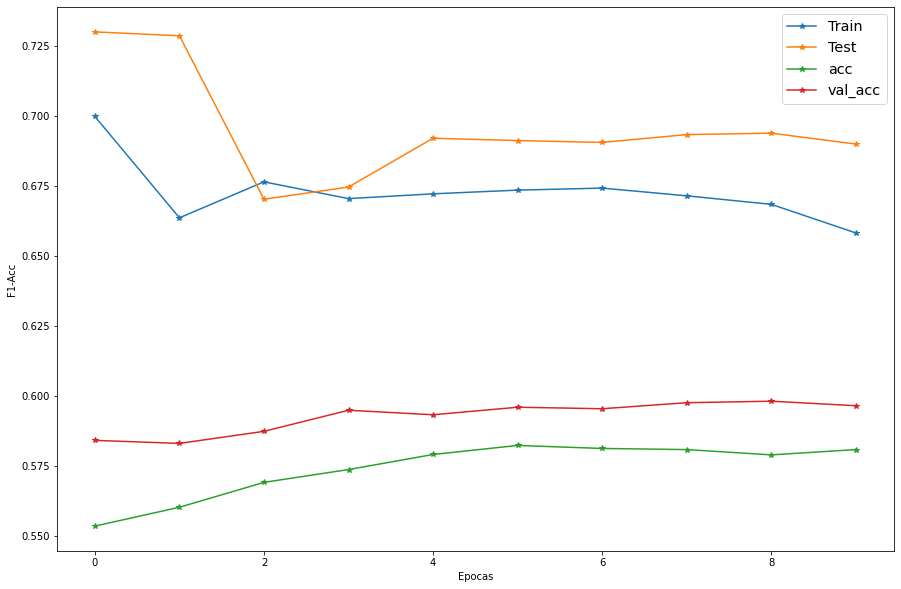

In [50]:
from IPython.core.pylabtools import figsize
# loss, accuracy, = model.evaluate(x_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
marker="*"
plt.figure(figsize=(15,10))
plt.plot(history.history['f1_m'],marker=marker)
plt.plot(history.history['val_f1_m'],marker=marker)
plt.plot(history.history['acc'],marker=marker)
plt.plot(history.history['val_acc'],marker=marker)
plt.xlabel('Epocas')
plt.ylabel('F1-Acc')

plt.legend(['Train','Test','acc','val_acc'],fontsize="x-large")



plt.show()

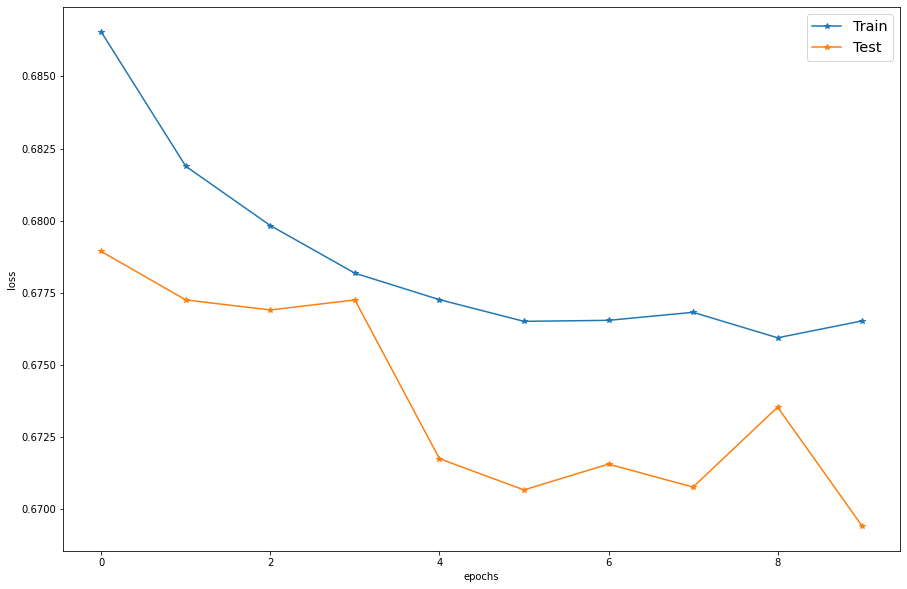

In [57]:
#Loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'],marker=marker)
plt.plot(history.history['val_loss'],marker=marker)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'], fontsize="x-large")
plt.show()